In [8]:
import pandas as pd
import os

base_path = r"C:\Users\sangh\OneDrive\바탕 화면\AI\Ecommerce-Data-Analysis-Practice\data"

file_names = {
    'general': "'25.12월 4주 주간아파트가격동향조사 시계열_매매변동률.csv",
    'age': "'25.12월 4주 주간아파트가격동향조사 시계열_연령별매매변동률.csv",
    'size': "'25.12월 4주 주간아파트가격동향조사 시계열_규모별매매변동률.csv"
}

def parse_date(date_series):
    parsed_dates = []
    current_year = 2012
    last_month = 0

    for date_str in date_series:
        if pd.isna(date_str):
            parsed_dates.append(pd.NaT)
            continue
        s = str(date_str).strip().replace("'", "")
        parts = s.split('.')

        try:
            if len(parts) == 3:
                y, m, d = int(parts[0]), int(parts[1]), int(parts[2])
                current_year = 2000 + y if y < 100 else y
            elif len(parts) == 2:
                m, d = int(parts[0]), int(parts[1])
                if last_month == 12 and m == 1:
                    current_year += 1
            else:
                parsed_dates.append(pd.NaT)
                continue
            last_month = m
            parsed_dates.append(pd.Timestamp(year=current_year, month=m, day=d))
        except:
            parsed_dates.append(pd.NaT)
    return parsed_dates

def load_clean_data(file_key, col_map):
    full_path = os.path.join(base_path, file_names[file_key])
    try:
        df = pd.read_csv(full_path, header=None, encoding='cp949')
    except:
        df = pd.read_csv(full_path, header=None, encoding='utf-8')
    
    start_idx = 0
    for idx, val in df[0].items():
        if str(val).strip().startswith("'") or (str(val)[0].isdigit() and '.' in str(val)): 
            start_idx = idx
            break
    df = df.iloc[start_idx:].reset_index(drop=True)

    result = pd.DataFrame()
    result['Date'] = parse_date(df[0])

    for col_idx, col_name in col_map.items():
        result[col_name] = pd.to_numeric(df[col_idx], errors='coerce')
    
    return result

print("로딩 중...")

df_gen = load_clean_data('general', {9: 'Seoul_General'})

age_cols = {36: 'Age_0_5', 37: 'Age_5_10', 38: 'Age_10_15', 39: 'Age_15_20', 40: 'Age_20_over'}
df_age = load_clean_data('age', age_cols)

size_cols = {42: 'Size_0_40', 43: 'Size_40_60', 44: 'Size_60_85', 45: 'Size_85_102', 46: 'Size_102_135', 47: 'Size_135_over'}
df_size = load_clean_data('size', size_cols)

df_final = pd.merge(df_gen, df_age, on='Date')
df_final = pd.merge(df_final, df_size, on='Date')

df_final.dropna(subset=['Date'], inplace=True)
df_final.sort_values('Date', inplace=True)
df_final.fillna(0, inplace=True)

output_path = os.path.join(base_path, "seoul_apartment_analysis_final.csv")
df_final.to_csv(output_path, index=False, encoding='cp949')

print("✅ 모든 데이터가 합쳐졌습니다.")
print(f"💾 저장 위치: {output_path}")
print(f"📊 데이터 크기: {df_final.shape}")

display(df_final.head())

로딩 중...
✅ 모든 데이터가 합쳐졌습니다.
💾 저장 위치: C:\Users\sangh\OneDrive\바탕 화면\AI\Ecommerce-Data-Analysis-Practice\data\seoul_apartment_analysis_final.csv
📊 데이터 크기: (709, 13)


,Date,Seoul_General,Age_0_5,Age_5_10,Age_10_15,Age_15_20,Age_20_over,Size_0_40,Size_40_60,Size_60_85,Size_85_102,Size_102_135,Size_135_over
125,2012-05-07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
126,2012-05-14,-0.30,-0.04,-0.18,-0.31,-0.45,-0.42,-0.04,0.0,-0.32,-0.29,-0.58,-0.21
127,2012-05-21,-0.10,-0.13,-0.11,-0.16,-0.29,-0.12,-0.04,0.0,-0.13,-0.16,-0.01,-0.14
128,2012-05-28,-0.18,-0.26,-0.06,-0.15,-0.25,-0.28,-0.06,0.0,-0.15,-0.21,-0.25,-0.20
129,2012-06-04,-0.17,-0.58,-0.23,-0.18,-0.27,-0.24,-0.14,0.0,-0.20,-0.28,-0.31,-0.23


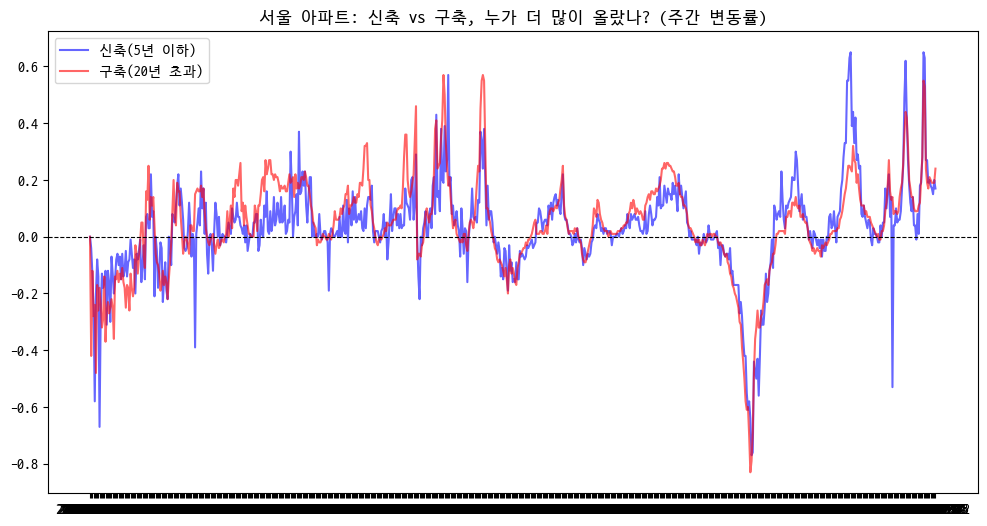

In [16]:
file_path = r"C:\Users\sangh\OneDrive\바탕 화면\AI\Ecommerce-Data-Analysis-Practice\data\seoul_apartment_analysis_final.csv"

df = pd.read_csv(file_path, encoding='cp949')

import matplotlib.pyplot as plt

plt.rc('font', family='D2Coding')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Age_0_5'], label='신축(5년 이하)', color='blue', alpha=0.6)
plt.plot(df['Date'], df['Age_20_over'], label='구축(20년 초과)', color='red', alpha=0.6)
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)

plt.title("서울 아파트: 신축 vs 구축, 누가 더 많이 올랐나? (주간 변동률)")
plt.legend()
plt.show()